In [65]:
# -*- coding: utf-8 -*-
"""
Created on Sun July 17 10:55:29 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn
import matplotlib.pyplot as plt

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data1 = pd.read_csv('gapminder.csv', skip_blank_lines=True,
                    usecols=['country','alcconsumption', 'lifeexpectancy'])
 
# Rename columns for clarity                                    
data1.columns = ['country','alcohol','life']

# Variables Descriptions
ALCOHOL = "2008 alcohol consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"

# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('alcohol','life') :
   data1[dt] = pd.to_numeric(data1[dt], 'errors=coerce') 

# Remove rows with nan values
data1 = data1.dropna(axis=0, how='any')

# Copy dataframe for univariate categorical variables
data2 = data1.copy()

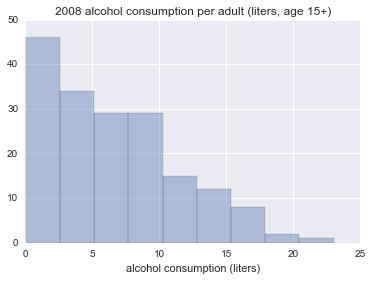

In [66]:
#Univariate histogram for alcohol consumption:
seaborn.distplot(data1["alcohol"].dropna(), kde=False);
plt.xlabel('alcohol consumption (liters)')
plt.title(ALCOHOL)
plt.show()

In [67]:
desc1 = data1["alcohol"].describe()
print (tabulate( [desc1], tablefmt="fancy_grid", headers=[i for i in desc1.index]))

╒═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│     176 │ 6.64625 │ 4.97741 │  0.03 │ 2.495 │ 5.865 │  9.81 │ 23.01 │
╘═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛


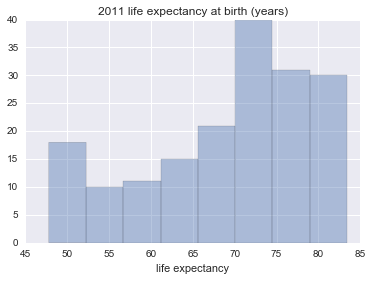

In [68]:
# Univariate histogram for Life Expectancy:
seaborn.distplot(data1["life"].dropna(), kde=False);
plt.xlabel('life expectancy')
plt.title(LIFE)
plt.show()

In [69]:
desc1 = data1["life"].describe()
print (tabulate( [desc1], tablefmt="fancy_grid", headers=[i for i in desc1.index]))

╒═════════╤═════════╤═════════╤════════╤════════╤═════════╤════════╤════════╕
│   count │    mean │     std │    min │    25% │     50% │    75% │    max │
╞═════════╪═════════╪═════════╪════════╪════════╪═════════╪════════╪════════╡
│     176 │ 69.1437 │ 9.82827 │ 47.794 │ 62.646 │ 72.5585 │ 75.985 │ 83.394 │
╘═════════╧═════════╧═════════╧════════╧════════╧═════════╧════════╧════════╛


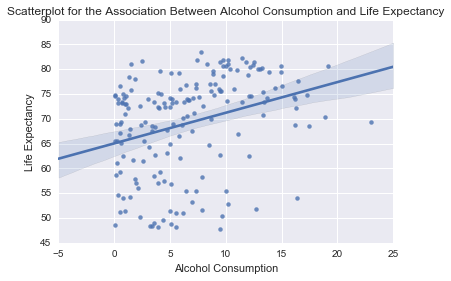

In [70]:
# basic scatterplot Q->Q
scat1 = seaborn.regplot(x="alcohol", y="life", fit_reg=True, data=data1)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Alcohol Consumption and Life Expectancy')
plt.show()

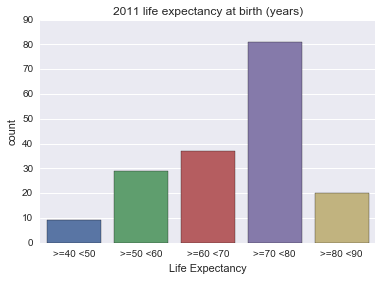

In [71]:
# univariate bar graph for categorical variable life

life_map = {1: '>=40 <50', 2: '>=50 <60', 3: '>=60 <70', 4: '>=70 <80', 5: '>=80 <90'}
data2['life'] = pd.cut(data1.life,[40,50,60,70,80,90], labels=['1','2','3','4','5'])

data2["life"] = data2["life"].astype('category')
data2["life"] = data2["life"].cat.rename_categories([i for i in life_map.values()])

seaborn.countplot(x="life", data=data2)
plt.xlabel('Life Expectancy')
plt.title(LIFE)
plt.show()

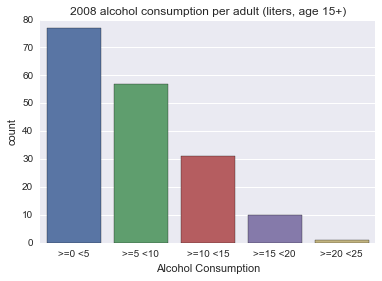

In [72]:
# univariate bar graph for categorical variable alcohol

alcohol_map = {1: '>=0 <5', 2: '>=5 <10', 3: '>=10 <15', 4: '>=15 <20', 5: '>=20 <25'}
data2['alcohol'] = pd.cut(data1.alcohol,[0,5,10,15,20,25], labels=['1','2','3','4','5'])

data2["alcohol"] = data2["alcohol"].astype('category')
data2["alcohol"] = data2["alcohol"].cat.rename_categories([i for i in alcohol_map.values()])

seaborn.countplot(x="alcohol", data=data2)
plt.xlabel('Alcohol Consumption')
plt.title(ALCOHOL)
plt.show()

In [73]:
# Just for test
gt0lt5 = data2[(data2['alcohol']==">=0 <5")].count()
print (tabulate([gt0lt5], tablefmt="fancy_grid", headers=([i for i in gt0lt5.index])))

╒═══════════╤═══════════╤════════╕
│   country │   alcohol │   life │
╞═══════════╪═══════════╪════════╡
│        77 │        77 │     77 │
╘═══════════╧═══════════╧════════╛


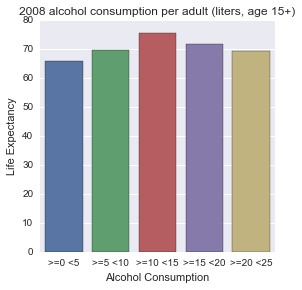

In [74]:
# bivariate bar graph C->C
data2['life'] = data1['life']

seaborn.factorplot(x='alcohol', y='life', data=data2, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title(ALCOHOL)
plt.show()